# EDA

In [3]:
import pandas as pd
import datetime


## train / test

In [4]:

path = '/Users/minji/Desktop/data/229255_bus_riders_at_rush_hour_data/'

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
bus_bts = pd.read_csv(path + "bus_bts.csv")

test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff
0,415423,2019-10-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,4.0,4.0,7.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,415424,2019-10-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,6.0,6.0,1.0,8.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2,415425,2019-10-01,4270000,시외,432,정존마을,33.48181,126.47352,2.0,4.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,415426,2019-10-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,18.0,8.0,26.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
4,415427,2019-10-01,4270000,시내,1636,롯데호텔,33.24872,126.41032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
train.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride'],
      dtype='object')

In [6]:
train_data = pd.melt(train, id_vars = ['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude'])

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400499 entries, 0 to 5400498
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   bus_route_id  int64  
 3   in_out        object 
 4   station_code  int64  
 5   station_name  object 
 6   latitude      float64
 7   longitude     float64
 8   variable      object 
 9   value         float64
dtypes: float64(3), int64(3), object(4)
memory usage: 412.0+ MB


In [8]:
train_data = train_data.rename(columns={'variable':'time','value':'count'})

#ride / takeoff를 구분하는 칼럼 생성
train_data['type'] = train_data['time'].apply(lambda x : x.split('_')[1])

In [39]:
train_data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,time,count,weekday,type
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,6~7_ride,0.0,6,ride
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,6~7_ride,1.0,6,ride
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,6~7_ride,1.0,6,ride
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,6~7_ride,0.0,6,ride
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,6~7_ride,0.0,6,ride


In [9]:
#date + time 6~7_ride	
train_data['start_date'] = str(train_data['date']) + " " + train_data['time'].apply(lambda x : x.split('~')[0])

: 

: 

In [32]:
date = "2019-10-01"
time = 6
date_time_obj = datetime.datetime.strptime(date + ' '+ str(time), '%Y-%m-%d %H')
date_time_obj

datetime.datetime(2019, 10, 1, 6, 0)

In [26]:
import datetime

date_time_str = '2018-06-29 8'  
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H')
date_time_obj

datetime.datetime(2018, 6, 29, 8, 0)

## 요일별로  승객수

In [14]:
#datetime으로 변환
train_data["date"] = pd.to_datetime(train_data["date"])

#요일 칼럼 생성 
train_data["weekday"] = train_data["date"].dt.weekday
train_data.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,variable,value,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,6~7_ride,0.0,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,6~7_ride,1.0,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,6~7_ride,1.0,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,6~7_ride,0.0,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,6~7_ride,0.0,6


In [15]:
bus_bts

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409409,6.573162e+15,30420000,149797565,2019-10-16,07:08:31,1937,L마트,NaN,NaN,NaN,NaN,1,1
2409410,9.441160e+15,30420000,149797565,2019-10-16,07:16:31,1908,한라산교회,NaN,NaN,NaN,NaN,1,1
2409411,9.446038e+15,25070000,149797565,2019-10-16,08:29:05,1882,고도농원,NaN,NaN,NaN,NaN,1,1
2409412,4.309690e+15,25070000,149797565,2019-10-16,08:40:32,1938,주공아파트5단지,NaN,NaN,NaN,NaN,1,1


In [29]:
# 일별로data.groupby(['date','variable']).sum()['value']


date        variable     
2019-09-01  10~11_ride        6774.0
            10~11_takeoff     4510.0
            11~12_ride        6731.0
            11~12_takeoff     4604.0
            18~20_ride       11537.0
                              ...   
2019-09-30  7~8_takeoff       6329.0
            8~9_ride         15699.0
            8~9_takeoff      10083.0
            9~10_ride        11803.0
            9~10_takeoff      7804.0
Name: value, Length: 390, dtype: float64

### 인기있는 정류장

In [44]:
data.groupby('station_name').sum()

,id,bus_route_id,station_code,latitude,longitude,value
station_name,,,,,,
(구)구판장,126930414,17249700000,2354079,18631.29762,70880.08785,76.0
(구)중문동주민센터,1553854887,202591090000,15039635,242932.45275,923728.97240,1893.0
(구)중앙파출소,1455551149,198384680000,14555008,230371.15088,876939.18728,3212.0
(구)화산초등학교,66649700,9626240000,1152528,10397.78844,39560.74356,37.0
1100고지휴게소,117244933,12491180000,1148680,18647.02138,70692.82896,100.0
...,...,...,...,...,...,...
흙통,214096233,24782550000,1999478,34592.59856,131645.84524,367.0
흥국사,72714655,8051030000,351585,11741.85090,44358.78798,36.0
흥덕사,49769226,7445490000,1146457,9117.94949,34637.15658,26.0


### 시내/시외 비율

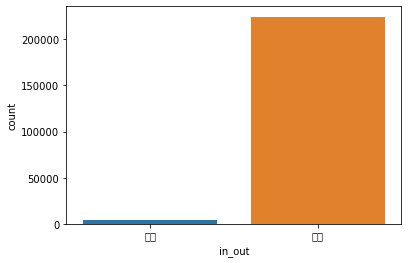

In [18]:
import seaborn as sns
g = sns.countplot(test['in_out'])

### 기간

In [21]:
train['date']

0         2019-09-01
1         2019-09-01
2         2019-09-01
3         2019-09-01
4         2019-09-01
             ...    
415418    2019-09-30
415419    2019-09-30
415420    2019-09-30
415421    2019-09-30
415422    2019-09-30
Name: date, Length: 415423, dtype: object

In [19]:
test['date']

0         2019-10-01
1         2019-10-01
2         2019-10-01
3         2019-10-01
4         2019-10-01
             ...    
228165    2019-10-16
228166    2019-10-16
228167    2019-10-16
228168    2019-10-16
228169    2019-10-16
Name: date, Length: 228170, dtype: object

## bus_bts EDA

In [8]:
bus_bts = pd.read_csv(path + "bus_bts.csv")

In [9]:
bus_bts.columns

Index(['user_card_id', 'bus_route_id', 'vhc_id', 'geton_date', 'geton_time',
       'geton_station_code', 'geton_station_name', 'getoff_date',
       'getoff_time', 'getoff_station_code', 'getoff_station_name',
       'user_category', 'user_count'],
      dtype='object')

In [7]:
bus_bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [10]:
len(bus_bts)

2409414

### 승차는했는데 하차는 없는 것 

In [9]:
bus_bts.isnull().sum()

user_card_id                0
bus_route_id                0
vhc_id                      0
geton_date                  0
geton_time                  0
geton_station_code          0
geton_station_name         49
getoff_date            895736
getoff_time            895736
getoff_station_code    895736
getoff_station_name    895775
user_category               0
user_count                  0
dtype: int64

### 어느 노선이 붐비는지

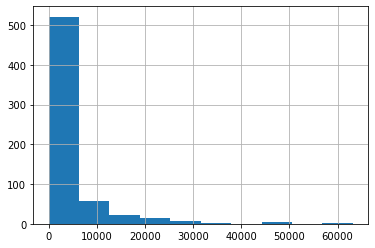

In [53]:
data = bus_bts.groupby('bus_route_id').sum()['user_count'].sort_values(ascending = False)
data.hist(bins = 10)